In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import WMAP9

In [3]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 150
plt.rc('text',usetex=True)

## check cosmology
http://www.astro.ucla.edu/~wright/CosmoCalc.html

In [4]:
z=0.5
dis = WMAP9.angular_diameter_distance(z).value*1000
sep_phys = 6.2 #kpc
print('angular sep (arcsec):',sep_phys / dis / np.pi * 180*3600)

angular sep (arcsec): 1.001144675490767


## replenishment/mass growth estimate

scaled by $t_\mathrm{between}/t_\mathrm{merge}$

In [ ]:
def merger_rate(z1,z2):
    n_sat_merge = np.array([])
    path = 'CUT_deep_catalogs/number_counts/'
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        n_sat_merge = np.append(n_sat_merge,np.genfromtxt(path+'number_sathist_merge_'+cat_name+'_'+str(z1)+'.txt'))
    return np.average(n_sat_merge)/(WMAP9.lookback_time(z1).value - WMAP9.lookback_time(z2).value)

def repl_rate(z1,z2):
    # unit: N\cdot Central^{-1} Gyr^{-1}
    path = 'CUT_deep_catalogs/number_counts/'
    all_n_sat_z1 = np.array([])
    all_n_sat_z2 = np.array([])
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        all_n_sat_z1 = np.append(all_n_sat_z1,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z1)+'.txt'))
        all_n_sat_z2 = np.append(all_n_sat_z2,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z2)+'.txt'))
        
    n_merge_rate = merger_rate(z1,z2)
    repl_rate = n_merge_rate + np.average(all_n_sat_z2)-np.average(all_n_sat_z1)
    print(np.average(all_n_sat_z2),np.average(all_n_sat_z1))
    return repl_rate

def mass_growth_rate(z1,z2):
    # unit 10^8 M_sun/Gyr
    path = 'CUT_deep_catalogs/number_counts/'
    mass_grow = np.array([])
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        mass_grow = np.append(mass_grow,np.genfromtxt(path+'mass_sathist_'+cat_name+'_'+str(z1)+'.txt'))
    return np.average(mass_grow)/(WMAP9.lookback_time(z1).value - WMAP9.lookback_time(z2).value)

fig = plt.figure( figsize=(6,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
   
ax1.errorbar([0.4,0.6,0.8],[merger_rate(0.4,0.2),merger_rate(0.6,0.4),merger_rate(0.8,0.6)],
             0.013,fmt='-or',capsize=4,ms=7,label='merger rate')
ax2.errorbar([0.4,0.6,0.8],[mass_growth_rate(0.4,0.2),mass_growth_rate(0.6,0.4),mass_growth_rate(0.8,0.6)],
             0.013,fmt='-ob',capsize=4,ms=7,label='mass growth rate')

ax1.set_xlabel('Redshift',fontsize=16)
ax1.set_ylabel(r'Merger Rate [$\mathrm{N\cdot Central^{-1} Gyr^{-1}}$]',fontsize=16,color='r')
ax2.set_ylabel(r'Mass Growth Rate [$10^8 M_\odot$/yr]',fontsize=16,color='b')

ax1.legend(fontsize=16) 
ax2.legend(fontsize=16,loc=(0.025,0.65)) 
plt.tight_layout()
plt.grid()
plt.savefig('figures/merger_rate.png',dpi=150)
plt.show()

In [ ]:
def combine_deep_smf3(ssfq, prefix,affix,z):
    
    smf = np.load(path+'smf_'+prefix+'_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf1 = np.load(path+'smf_'+prefix+'_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2 = np.load(path+'smf_'+prefix+'_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3 = np.load(path+'smf_'+prefix+'_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4 = np.load(path+'smf_'+prefix+'_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return smf+smf1+smf2+smf3+smf4

In [ ]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(10,8))

path = 'CUT_deep_catalogs/test_smf/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

#load data
all_200 = combine_deep_smf3('all','0.2',z='0.4',affix = '_new')
all_60 = combine_deep_smf3('all','0.06',z='0.4',affix = '_new')
all_0 = combine_deep_smf3('all','0.0',z='0.4',affix = '_new')

print(all_200)
print(all_60)
print(all_0)
# all
axs.plot(bin_edges, all_200,'k',label='$200-700$ kpc')
axs.plot(bin_edges, all_60,'--k',label='$60-200$ kpc')
axs.plot(bin_edges, all_0,'-.k',label='$0-60$ kpc')

# axs.plot(bin_edges, all_lt60+all_60,'-.k')
axs.axvline(x=9.5,ymin=0,ymax=1e5)

axs.set_yscale('log')
axs.legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('$\log(M/M_\odot)$', fontsize=17)
plt.ylabel('Number of Galaxies', fontsize=17)
plt.savefig('figures/satellite_smf.png')
plt.show()

## Illustration of satellite selection

In [5]:
import aplpy

/Users/lejay/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


INFO: Deleting work directory /var/folders/gz/gqyrb0dj0hd3cczx_rh4xly00000gn/T/tmpnwz1n271 [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/gz/gqyrb0dj0hd3cczx_rh4xly00000gn/T/tmpc7w_r7y4 [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/gz/gqyrb0dj0hd3cczx_rh4xly00000gn/T/tmpmsxqop5y [montage_wrapper.wrappers]
INFO: Auto-setting vmax to  6.284e+02 [aplpy.core]


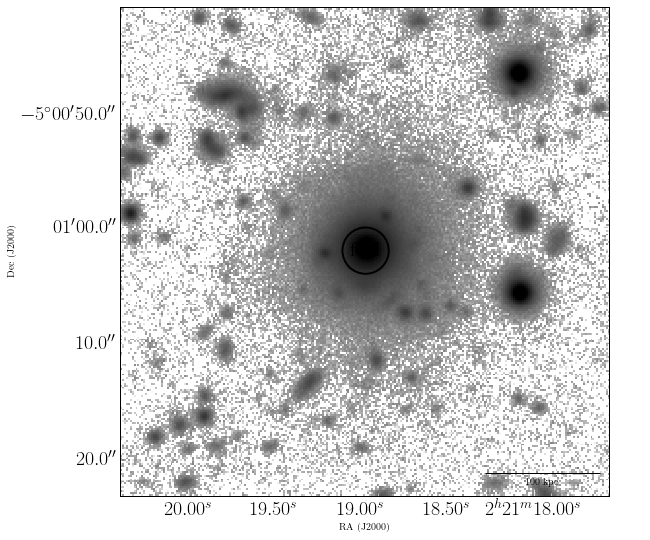

In [10]:
img = 'CUT_deep_catalogs/test.fits'

fig=aplpy.FITSFigure(img)
aplpy.make_rgb_cube([img,img,img], 'figures/cube.fits')

fig.show_grayscale(stretch='log',vmin=0.1,invert=True)
fig.add_label(35.32905969514562, -5.01725845902161,'fdfd',fontsize=20,color='k')
fig.show_circles(35.32905969514562, -5.01725845902161, 2./3600,linewidth=2,color='k')
fig.add_scalebar(10/3600.)
fig.scalebar.set_label('100 kpc')

## Poststamp mosaic images

In [5]:
import aplpy
img_r = 'CUT_deep_catalogs/central_r.fits'
img_g = 'CUT_deep_catalogs/central_g.fits'
img_b = 'CUT_deep_catalogs/central_us.fits'
aplpy.make_rgb_cube([img_r,img_g,img_b], 'figures/cube.fits')
aplpy.make_rgb_image('figures/cube.fits','rgb_image_arcsinh.png',
                      stretch_r='log', stretch_g='log',
                      stretch_b='log',vmin_r=0,vmin_g=0,vmin_b=0)

INFO: Deleting work directory /var/folders/gz/gqyrb0dj0hd3cczx_rh4xly00000gn/T/tmpx1hfiot0 [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/gz/gqyrb0dj0hd3cczx_rh4xly00000gn/T/tmp00g6uirp [montage_wrapper.wrappers]
INFO: Deleting work directory /var/folders/gz/gqyrb0dj0hd3cczx_rh4xly00000gn/T/tmp72monub7 [montage_wrapper.wrappers]


INFO: Red: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.430e+00 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  2.330e+00 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.049e+01 (auto) [aplpy.rgb]


/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/image_util.py:97: RuntimeWarning: invalid value encountered in log10
  return np.log10(array / midpoint + 1.) / np.log10(1. / midpoint + 1.)


In [9]:
aplpy.version.version

'1.1.1'

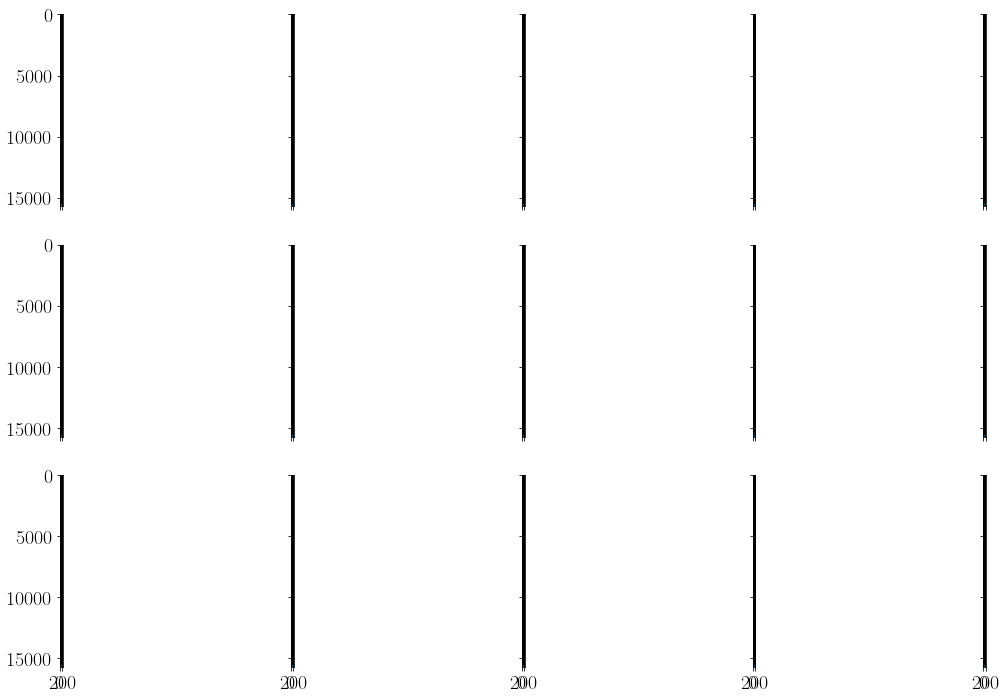

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astropy.io import fits

fig, axs = plt.subplots(3,5, sharex=True, sharey=True, figsize=(20,12))
for i in range(3):
    for j in range(5): 
        img=mpimg.imread('rgb_image_arcsinh.png')
        axs[i][j].imshow(img,cmap='binary')

plt.show()

## Binning Test
1. more bins
2. move boundary
3. no spatial correction included because correction was done in 14 bins 10-700 kpc

In [ ]:
def combine_deep(csfq, ssfq, masscut_low, masscut_high, z, path, prefix=''):
    
    affix = '_' + str(masscut_low) + '_' + str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))+'.txt'
    cosmos_deep = np.genfromtxt(path+prefix+'countCOSMOS_deep'+affix)
    sxds_uddd = np.genfromtxt(path+prefix+'countSXDS_uddd'+affix)
    elais_deep = np.genfromtxt(path+prefix+'countELAIS_deep'+affix)
    xmmlss_deep = np.genfromtxt(path+prefix+'countXMM-LSS_deep'+affix)
    deep_deep = np.genfromtxt(path+prefix+'countDEEP_deep'+affix)
    
    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    
    split_index = int(((len(cosmos_deep)-1)/2)+1)
    radial_cosmos = cosmos_deep[1:split_index]
    radial_sxds = sxds_uddd[1:split_index]
    radial_elais = elais_deep[1:split_index]
    radial_xmmlss = xmmlss_deep[1:split_index]
    radial_deep = deep_deep[1:split_index]
    radial_combine = np.vstack([radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais])

    radial = np.average(radial_combine, axis=0, weights=n_combine)
    
    radial_cosmos_err = cosmos_deep[split_index:]
    radial_sxds_err = sxds_uddd[split_index:]
    radial_elais_err = elais_deep[split_index:]
    radial_xmmlss_err = xmmlss_deep[split_index:]
    radial_deep_err = deep_deep[split_index:]
    radial_combine_err = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial_err = np.sqrt(radial_cosmos_err**2*n_cosmos**2+radial_xmmlss_err**2*n_xmmlss**2+radial_elais_err**2*n_elais**2+radial_sxds_err**2*n_sxds**2+radial_deep_err**2*n_deep**2)/np.sum(n_combine)
    return (radial, radial_err, sum(n_combine))

In [ ]:
# combine_deep(csfq, ssfq, masscut_low, masscut_high, z, path)

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))

radial_4 = combine_deep('all','all','9.5','inf',0.4, path='CUT_deep_catalogs/total_sample/')
radial_10bin = combine_deep('all','all','9.5','inf',0.4, path='CUT_deep_catalogs/total_sample_rebin/',prefix='10bin_')
radial_20bin = combine_deep('all','all','9.5','inf',0.4, path='CUT_deep_catalogs/total_sample_rebin/',prefix='20bin_')
bin_centers = np.load('CUT_deep_catalogs/total_sample/'+'bin_centers.npy')
bin_centers_10bin = np.load('CUT_deep_catalogs/total_sample_rebin/'+'10bin_bin_centers.npy')
bin_centers_20bin = np.load('CUT_deep_catalogs/total_sample_rebin/'+'20bin_bin_centers.npy')

plt.errorbar(bin_centers, radial_4[0],yerr=radial_4[1],label='14 bin')
plt.errorbar(bin_centers_10bin, radial_10bin[0],yerr=radial_10bin[1],label='10 bin')
plt.errorbar(bin_centers_20bin, radial_20bin[0],yerr=radial_20bin[1],label='20 bin')
plt.axhline(2e-5,10,700,linewidth=4, color='r')

plt.xlabel('Projected Radius [kpc]', fontsize=15)
plt.ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=15)
plt.legend(fontsize=15)
plt.xscale('log')
plt.yscale('log')

plt.savefig('figures/rebin_z_0.4.png')
plt.show()

In [ ]:
# combine_deep(csfq, ssfq, masscut_low, masscut_high, z, path)

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))

radial_4 = combine_deep('all','all','9.5','inf',0.4, path='CUT_deep_catalogs/total_sample/')
radial_10bin = combine_deep('all','all','9.5','inf',0.4, path='CUT_deep_catalogs/total_sample_rebin/',prefix='start5_')
radial_20bin = combine_deep('all','all','9.5','inf',0.4, path='CUT_deep_catalogs/total_sample_rebin/',prefix='start15_')
bin_centers = np.load('CUT_deep_catalogs/total_sample/'+'bin_centers.npy')
bin_centers_10bin = np.load('CUT_deep_catalogs/total_sample_rebin/'+'start5_bin_centers.npy')
bin_centers_20bin = np.load('CUT_deep_catalogs/total_sample_rebin/'+'start15_bin_centers.npy')

plt.errorbar(bin_centers, radial_4[0],yerr=radial_4[1],label='10 kpc')
plt.errorbar(bin_centers_10bin, radial_10bin[0],yerr=radial_10bin[1],label='5 kpc')
plt.errorbar(bin_centers_20bin, radial_20bin[0],yerr=radial_20bin[1],label='15 kpc')
plt.axhline(2e-5,10,700,linewidth=4, color='r')

plt.xlabel('Projected Radius [kpc]', fontsize=15)
plt.ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=15)
plt.legend(fontsize=15)
plt.xscale('log')
plt.yscale('log')

plt.savefig('figures/sp_change_z_0.4.png')
plt.show()



## Cluster Validation
red-sequence method

In [3]:
from scipy.optimize import curve_fit

def linear(x,a,b):
    return x*a+b

def fit_linear(xdata, ydata):
    popt,pcov = curve_fit(linear, xdata, ydata)
    return popt,pcov



In [17]:
import glob
file_list = glob.glob('CUT_deep_catalogs/satellite_catalogs/*')
print('Number of central gals to go :',len(file_list))

for catalog in file_list:
    plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
    fig, axs = plt.subplots(1, 1, figsize=(8,6.5))

    cat = Table.read(catalog)
    comps = catalog.split('_')
    gal_z = comps[-3]
    gal_sfprob = comps[-2]
    
    # all galaxies in the aperture
    # AB=2.5*(23-log10(F/Jy))-48.6
    cat = cat[cat['MASS_MED']>8.0]
    color_gr = cat['MAG_ABS_HSC_G'] - cat['MAG_ABS_HSC_R']
    mag_r = 2.5*(23-np.log10(cat['FLUX_TOT_HSC_R']))-48.6
    plt.scatter(mag_r, color_gr, marker='.', s=40,alpha=1,c=cat['sfProb'],cmap='jet_r',vmin=0,vmax=1,label='All Companions, n='+str(len(cat)))
    
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('sf Prob',fontsize=18)
    
    # plot central galaxy
    plt.scatter([mag_r[-1]], [color_gr[-1]], marker='*', s=200, alpha=1,c=[cat['sfProb'][-1]],cmap='jet_r',vmin=0,vmax=1,label='Central Galaxy')
    cat=cat[:-1]
    
    # quiescent portion
    cat = cat[cat['sfProb']<0.5]
    cat = cat[cat['MAG_ABS_HSC_G'] - cat['MAG_ABS_HSC_R']<1.1]
    color_gr = cat['MAG_ABS_HSC_G'] - cat['MAG_ABS_HSC_R']
    mag_r = 2.5*(23-np.log10(cat['FLUX_TOT_HSC_R']))-48.6
    plt.scatter(mag_r, color_gr, marker='X', s=40,alpha=1,c=cat['sfProb'],cmap='jet_r',vmin=0,vmax=1,label='Quiescent Companions, n='+str(len(cat)))
    
    #linear fit for red sequence
    try:
        popt,pcov = fit_linear(mag_r, color_gr)
    except TypeError:
        continue
    x_fit = np.linspace(20,28,100)
    plt.plot(x_fit,linear(x_fit,popt[0],popt[1]),color='r',alpha=0.7)
    
#     plt.xlim([-25,-13])
    plt.ylim([-1,1.5])
    plt.xlabel('$m_r$',fontsize=18)
    plt.ylabel('$g-r$',fontsize=18)
    plt.annotate('Central Gal: $z$ = '+gal_z+', sfProb = '+gal_sfprob,xy=([0.03,0.95]),xycoords='axes fraction',fontsize=16)
    plt.grid()
    plt.legend(loc='lower left',fontsize=16)
    plt.tight_layout()
    print(catalog.replace('.fits','.png').replace('CUT_deep_catalogs/satellite_catalogs/',''))
    
    plt.savefig('figures/CMDs/'+catalog.replace('.fits','.png').replace('CUT_deep_catalogs/satellite_catalogs/',''))
    plt.close()


Number of central gals to go : 285
SXDS_uddd_8523480009536_0.43_0.24_.png
COSMOS_deep_9813060012521_0.37_0.51_.png
COSMOS_deep_9813640016276_0.37_0.32_.png
XMM-LSS_deep_8283280004535_0.33_0.37_.png
XMM-LSS_deep_8524550007520_0.31_0.34_.png
COSMOS_deep_9813460006467_0.38_0.39_.png
XMM-LSS_deep_8524310002690_0.38_0.4_.png
DEEP_deep_9707510010483_0.48_0.39_.png
XMM-LSS_deep_8524310010357_0.34_0.25_.png
DEEP_deep_9464070005228_0.47_0.29_.png
DEEP_deep_9707330012028_0.3_0.42_.png
XMM-LSS_deep_8767600001969_0.3_0.67_.png
XMM-LSS_deep_8524240001038_0.46_0.41_.png
ELAIS_deep_17271670006232_0.38_0.22_.png
COSMOS_deep_9813770010956_0.37_0.38_.png
COSMOS_deep_9813770009109_0.46_0.22_.png
DEEP_deep_9707540001734_0.31_0.53_.png
XMM-LSS_deep_8524260001311_0.31_0.62_.png
DEEP_deep_9707230013395_0.38_0.29_.png
XMM-LSS_deep_8525670010818_0.3_0.3_.png
COSMOS_deep_9812050007932_0.47_0.27_.png
DEEP_deep_9707520011472_0.48_0.32_.png
COSMOS_deep_9570360015514_0.46_0.39_.png
COSMOS_deep_9813770016219_0.38_0.

/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


DEEP_deep_9463260005772_0.42_0.83_.png
DEEP_deep_9464740005460_0.34_0.36_.png
DEEP_deep_9707730013359_0.44_0.19_.png
DEEP_deep_9463540002817_0.4_0.21_.png
COSMOS_deep_9813670016106_0.38_0.3_.png
COSMOS_deep_9813850006506_0.49_0.31_.png
COSMOS_deep_9813860005317_0.38_0.31_.png
DEEP_deep_9707530007786_0.4_0.28_.png
COSMOS_deep_9812110010224_0.32_0.59_.png
XMM-LSS_deep_8524580013285_0.33_0.37_.png
XMM-LSS_deep_8524220009144_0.41_0.44_.png
DEEP_deep_9707320004901_0.43_0.19_.png
COSMOS_deep_9813360018156_0.38_0.32_.png
DEEP_deep_9464480009375_0.49_0.4_.png
DEEP_deep_9464370005332_0.48_0.27_.png
COSMOS_deep_10055400010988_0.47_0.2_.png
COSMOS_deep_10055610006397_0.31_0.43_.png
XMM-LSS_deep_8524270009192_0.43_0.2_.png
DEEP_deep_9464550004760_0.38_0.82_.png
DEEP_deep_9463220012125_0.47_0.17_.png
DEEP_deep_9707120002510_0.34_0.31_.png
DEEP_deep_9463350003517_0.43_0.47_.png
COSMOS_deep_9813330004320_0.31_0.3_.png
DEEP_deep_9463420016576_0.47_0.18_.png
XMM-LSS_deep_8524180010227_0.47_0.22_.png
XM

/Users/lejay/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


DEEP_deep_9707620012290_0.42_0.35_.png
DEEP_deep_9707620013520_0.38_0.28_.png
COSMOS_deep_9813400011969_0.38_0.33_.png
COSMOS_deep_9813560019026_0.38_0.3_.png
ELAIS_deep_17130160015523_0.38_0.34_.png
DEEP_deep_9464280015220_0.31_0.29_.png
COSMOS_deep_9813410003047_0.47_0.2_.png
DEEP_deep_9464330008853_0.48_0.28_.png
DEEP_deep_9707620010886_0.39_0.34_.png
COSMOS_deep_10055700009303_0.43_0.23_.png
SXDS_uddd_8765300005435_0.49_0.22_.png
COSMOS_deep_9813230002632_0.38_0.27_.png
DEEP_deep_9707230010095_0.34_0.52_.png
DEEP_deep_9707220009496_0.34_0.91_.png
DEEP_deep_9707240003755_0.41_0.51_.png
XMM-LSS_deep_8525760001188_0.33_0.4_.png
ELAIS_deep_17130760010223_0.31_0.37_.png
DEEP_deep_9707530007377_0.31_0.72_.png
DEEP_deep_9464380008608_0.31_0.3_.png
COSMOS_deep_9570270013440_0.33_0.65_.png
DEEP_deep_9706030013971_0.46_0.2_.png
DEEP_deep_9464430014088_0.38_0.25_.png
DEEP_deep_9464380004063_0.38_0.55_.png
XMM-LSS_deep_8524150006001_0.38_0.36_.png
DEEP_deep_9464560004483_0.31_0.34_.png
COSMOS_

## Massive gal properties

In [21]:
from astropy.table import vstack

file_list = glob.glob('CUT_deep_catalogs/massive_gal_positions/*.fits')

cat_list = []
for file in file_list:
    cat_list.append(Table.read(file))
    
cat_massive_gals = vstack(cat_list)

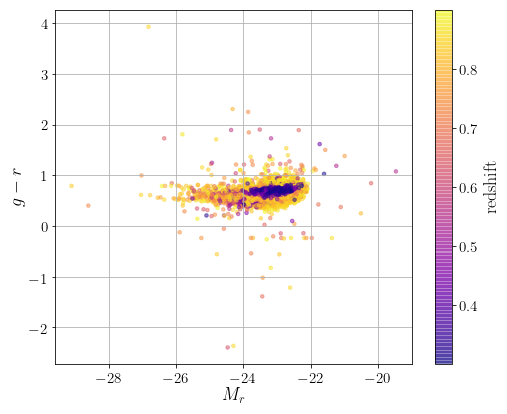

In [57]:
# Color-Magnitude Diagram

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(8,6.5))

plt.scatter(cat_massive_gals['MAG_ABS_HSC_R'],cat_massive_gals['MAG_ABS_HSC_G'] - cat_massive_gals['MAG_ABS_HSC_R'],
           marker='.',s=50,alpha=0.5,c=cat_massive_gals['zKDEPeak'],cmap='plasma')
cbar = plt.colorbar()
cbar.ax.set_ylabel('redshift',fontsize=18)
plt.xlabel('$M_r$',fontsize=18)
plt.ylabel('$g-r$',fontsize=18)
plt.grid()
plt.savefig('figures/massive_gal_cmd.png')

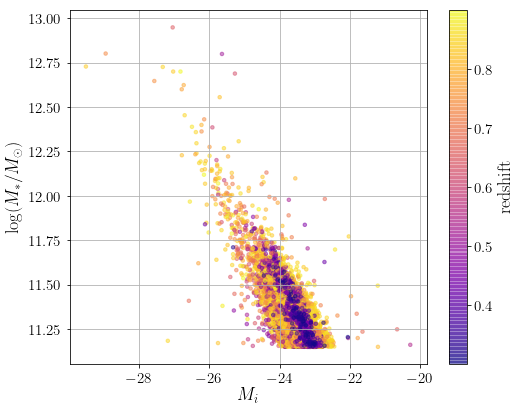

In [80]:
# Magnitude vs M_stellar

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(8,6.5))

plt.scatter(cat_massive_gals['MAG_ABS_HSC_I'],cat_massive_gals['MASS_MED']
           ,marker='.',s=50,alpha=0.5,c=cat_massive_gals['zKDEPeak'],cmap='plasma')

cbar = plt.colorbar()
cbar.ax.set_ylabel('redshift',fontsize=18)
    
plt.xlabel('$M_i$',fontsize=18)
plt.ylabel('$\log(M_*/M_\odot)$',fontsize=18)
plt.grid()
plt.savefig('figures/massive_gal_mass_mag.png')

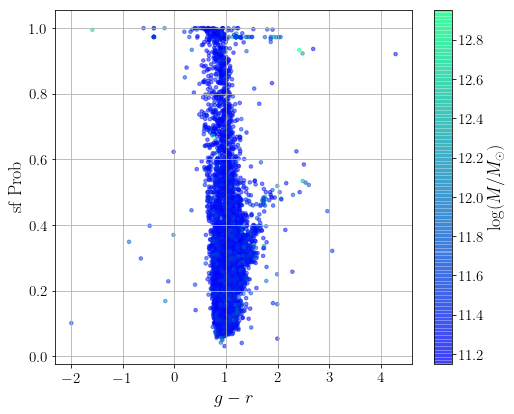

In [78]:
# sfProb vs M_stellar

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(8,6.5))

plt.scatter(cat_massive_gals['MAG_ABS_HSC_G'] - cat_massive_gals['MAG_ABS_HSC_I'],cat_massive_gals['sfProb']
            ,marker='.',s=50,alpha=0.5,c=cat_massive_gals['MASS_MED'],cmap='winter')

cbar = plt.colorbar()
cbar.ax.set_ylabel('$\log(M/M_\odot)$',fontsize=18)
plt.xlabel('$g-r$',fontsize=18)
plt.ylabel('sf Prob',fontsize=18)
plt.grid()
plt.savefig('figures/massive_gal_sfprob_color.png')
plt.show()